# Question 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

class NN():
    def __init__(self, architecture, learning_rate=0.1, activation=lambda x: x, activation_grad=lambda x: 1):
        '''This is a fully connected NN. The architecture is a list, 
        with each element specifying the number of nodes in each layer'''
        self.arch = architecture
        self.num_layers = len(self.arch) - 1
        self.activation = activation
        self.activation_grad = activation_grad
        self.lr = learning_rate
        self.init_weights()

        
    def init_weights(self):
        np.random.seed(0) # don't modify this. GSI uses this for checking outputs
        self.weights = []
        self.biases= []
        for n in range(self.num_layers):
            # Initialize weights and biases for each layer
            self.weights.append(np.random.rand(self.arch[n], self.arch[n+1]))
            self.biases.append(np.random.rand(self.arch[n+1]))
        
    
    def feed_forward(self, X):
        
        self.a_ns = [X] # List to hold the activations for each layer. The first activation is the input itself
        self.z_ns = [] # List to hold the z vectors for each layer
        
        for n in range(self.num_layers):
            z_n = self.a_ns[-1] @ self.weights[n] + self.biases[n]
            a_n = self.activation(z_n)
            self.a_ns.append(a_n)
            self.z_ns.append(z_n)
        return self.a_ns[-1] # The last activation is the output of the network
 

    def loss_func(self, X, y):
        a_L = self.feed_forward(X)
        return 0.5 * np.mean((a_L - y) ** 2)
    
    
    def calc_layer_errors(self, X, y):
        self.layer_errors = []
        
        # Start with the error at the output layer
        a_L = self.a_ns[-1]
        delta_L = (a_L - y) * self.activation_grad(self.z_ns[-1]) / (1 * self.arch[1]) # Nbz = 1 one node sent one data; NL = number of neurons in the l-th layer
        self.layer_errors.append(delta_L)
        
        # Then propagate the error backwards through the hidden layers
        for n in reversed(range(1, self.num_layers)):
            delta = self.layer_errors[-1] @ self.weights[n].T * self.activation_grad(self.z_ns[n-1])
            self.layer_errors.append(delta)
        # Reverse the list so that it's in the right order for backpropagation
        self.layer_errors.reverse()

        return self.layer_errors
    
    
    def calc_grads(self, X, y):
        self.calc_layer_errors(X, y)
        self.weights_grad = []
        self.biases_grad = []
        for n in range(self.num_layers):
            weight_grad = self.a_ns[n].T @ self.layer_errors[n] / X.shape[0]
            bias_grad = np.sum(self.layer_errors[n], axis=0) 
            self.weights_grad.append(weight_grad)
            self.biases_grad.append(bias_grad)
            
    
    def back_prop(self, X, y):
        self.calc_grads(X, y)
        # Update weights and biases using the gradients and the learning rate
        for n in range(self.num_layers):
            self.weights[n] -= self.lr * self.weights_grad[n]
            self.biases[n] -= self.lr * self.biases_grad[n]

    

## (a)

In [3]:
nn = NN([6, 2, 2], 0.1, tanh, tanh_grad)

# print the initialized weights
for i, (w, b) in enumerate(zip(nn.weights, nn.biases)):
    print(f"Layer {i+1} weights:\n{w}\n")
    print(f"Layer {i+1} biases:\n{b}\n")
    

Layer 1 weights:
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]]

Layer 1 biases:
[0.56804456 0.92559664]

Layer 2 weights:
[[0.07103606 0.0871293 ]
 [0.0202184  0.83261985]]

Layer 2 biases:
[0.77815675 0.87001215]



## (b)

*For debugging*: if you use `np.random.random` to initialize weights and biases and set `np.random.seed(0)`. You will get `[[0.64027023 0.25119984]]` as the prediction

In [4]:

# Given the input pattern for one amino acid sequence
input_pattern = np.array([[-1, 1, -1, -1, 1, -1]])  # Concatenated input for i-1, i, i+1, i+2, i+3, i+4

# Feedforward to get the prediction
prediction = nn.feed_forward(input_pattern)

# print the prediction
print("Predicted output:", prediction)



Predicted output: [[0.64027023 0.25119984]]


## (c)

*Hint*: For the definition of layer errors, you can refer to the matrial in bCourses: `Files > Homework > HW3 > Guide_ANN.pdf`. You will use these errors in back-propagation.

*For debugging*: `[array([[0.08505865, 0.23282824]]), array([[0.48392403, 0.58612371]])]` are errors for two layers.

In [5]:

# The actual observed output for the given pattern
observed_output = np.array([[-1, -1]])

# Calculate the layer errors based on the observed output and the predicted output
layer_errors = nn.calc_layer_errors(input_pattern, observed_output)

# Print the calculated layer errors for all nodes that are not in the input layer
for i, layer_error in enumerate(layer_errors, start=1):
    print(f"Layer {i} error:\n{layer_error}\n")
    

Layer 1 error:
[[0.08505865 0.23282824]]

Layer 2 error:
[[0.48392403 0.58612371]]



## (d)

In [6]:
# Perform back-propagation to update the weights and biases using the calculated gradients and learning rate
nn.back_prop(input_pattern, observed_output)

# Print the updated weights and biases
for i, (w, b) in enumerate(zip(nn.weights, nn.biases)):
    print(f"Updated Layer {i+1} weights:\n{w}\n")
    print(f"Updated Layer {i+1} biases:\n{b}\n")

Updated Layer 1 weights:
[[0.55731937 0.73847219]
 [0.59425751 0.52160036]
 [0.43216066 0.66917694]
 [0.44609308 0.91505582]
 [0.9551569  0.3601587 ]
 [0.8002309  0.55217774]]

Updated Layer 1 biases:
[0.5595387  0.90231381]

Updated Layer 2 weights:
[[0.07428843 0.09106854]
 [0.05552456 0.87538229]]

Updated Layer 2 biases:
[0.72976435 0.81139978]



# Question 2

**If you want, you can read the following material to help you with the code!**

Let's denote $a$ as the output of our simple perceptron model.

$$ \mathbf{a} = \sigma(\mathbf{z}) = \sigma(\mathbf{Xw+b}) $$

where $X\in \mathbb{R}^{N_{bz}\times N_f}$ is the input data, $N_{bz}$ is the batch size (i.e. number of samples in one calculation) and $N_f$ is the dimension of input features. $\mathbf{w}\in \mathbb{R}^{N_f\times N_o}$ is the weights matrix and $\mathbf{b}\in \mathbb{R}^{N_o}$ is the biases. $N_o$ is the dimension of outputs. $\sigma$ is the activation function.

The loss function is defined as half of the mean squared error (MSE) bewteen predicted values $\mathbf{a}$ and the ground truth $\mathbf{O}$:

$$ C = \frac{1}{2}\mathrm{MSE}(\mathbf{a, O}) = \frac{1}{2N_{bz}N_o}\sum_{m}^{N_{bz}}\sum_{i}^{N_o}(a_{mi}-O_{mi})^2$$

Using the chain rule to calculate the gradient of weights and biases. First define

$$ \boldsymbol{\delta} = \frac{\partial C}{\partial \mathbf{z}} = \frac{\partial C}{\partial \mathbf{a}}\odot \sigma'(z) = \frac{1}{N_{bz}N_o}(\mathbf{a}-\mathbf{O})\odot\sigma'(\mathbf{z})$$

where $\odot$ is elementwise product.

$$ \frac{\partial C}{\partial \mathbf{w}} =  \mathbf{X}^T\frac{\partial C}{\partial \mathbf{z}} = \mathbf{X}^T\boldsymbol{\delta}$$

$$ \frac{\partial C}{\partial \mathbf{b}} =  \sum_{m}^{N_{bz}}\boldsymbol{\delta}_m$$

where $\boldsymbol{\delta}_m$ is the $m$-th row of matrix $\boldsymbol{\delta}$.

In [7]:
# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [8]:
class SimplePerceptron():
    """
    Implementation of simple perceptron regressor
    """
    def __init__(
        self, 
        input_dim, 
        output_dim, 
        learning_rate=0.0001,
        activation=lambda x: x,
        activation_grad=lambda x: 1
    ):
        """
        Initialize a simple perceptron regressor
        
        Parameters
        ----------
        input_dim: int
            Input dimension
        output_dim: int
            Output dimension
        learning_rate: float
            Learning Rate
        activation: Callable
            Activation function
        activation_grad: Callable
            Activation function's first derivative
        """
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        self.activation_grad = activation_grad
        self.lr = learning_rate
        self.weights = np.random.randn(input_dim, output_dim) * 0.01 #initialize the weights
        self.biases = np.zeros(output_dim)


    def predict(self, X):
        """
        Get predicted values of given input
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        
        Returns
        -------
        y: numpy.ndarray
            Output, shape (n_samples, output_dim)
        """
        # Convert rank-1 array to rank-2
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        
        # Check that the dimension of accepted input data is the same as expected
        dim = X.shape[1]
        if dim != self.input_dim:
            raise Exception(f"Expected input size {self.input_dim}, accepted {dim}")
        
        self.z = X @ self.weights + self.biases 
        self.a = self.activation(self.z) 
        return self.a
    
    def fit(self, X, y):
        """
        Fit the model by doing an steepest descent step
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        """        
        self.predict(X)
        
        errors = (self.a - y) * self.activation_grad(self.z) / y.size   #shape (n_samples, output_dim) 
        weights_grad = np.dot(X.T, errors)                              #shape (input_dim, ouput_dim)
        bias_grad = np.sum(errors, axis=0)                              #shape (output_dim,)

        # Update weights and biases from the gradient
        # just do a simple gradient descent
        self.weights -= self.lr * weights_grad
        self.biases -= self.lr * bias_grad
        
    def train_one_epoch(self, X, y, batch_size=32):
        """
        Train the model for one epoch
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        batch_size: int
            Batch size
        """
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        if len(y.shape) == 1:
            y = y.reshape((-1, 1))
            
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for i in range(0, X.shape[0], batch_size):
            batch = indices[i: i+batch_size]
            self.fit(X[batch], y[batch])

    def evaluate(self, X, y):
        """
        Get the loss function with given data
        
        Parameters
        ----------
        X: numpy.ndarray
            Input samples, shape (n_samples, input_dim)
        y: numpy.ndarray
            Labels, shape (n_samples, output_dim)
        
        Returns
        -------
        L: float
            Loss function value.
        """
        # Transform the single-sample data into 2-dimensional, for the convenience of matrix multiplication
        if len(X.shape) == 1:
            X = X.reshape((-1, 1))
        if len(y.shape) == 1:
            y = y.reshape((-1, 1))
            
        y_pred = self.predict(X)
        # mean squared error
        mse = np.mean((y_pred - y) ** 2) / 2
        return mse
    
    def get_weights(self):
        """
        Get weights and biases
        """
        return self.weights.copy(), self.biases.copy()
    
    def set_weights(self, weights, biases):
        """
        Set weights and biases
        """
        self.weights = weights
        self.biases = biases

In [9]:
# Check if the implementation has any issues by creating an instance
input_dim = 8  # Example input dimension, this should be the number of features after one-hot encoding
output_dim = 2  # Example output dimension, this should be 1 for binary classification, adjusted for example

# Create a SimplePerceptron instance
perceptron = SimplePerceptron(input_dim=input_dim, output_dim=output_dim,
                              learning_rate=0.0001, activation=sigmoid,
                              activation_grad=sigmoid_grad)

# Print out the initial weights and biases
perceptron.get_weights()

(array([[ 0.01494079, -0.00205158],
        [ 0.00313068, -0.00854096],
        [-0.0255299 ,  0.00653619],
        [ 0.00864436, -0.00742165],
        [ 0.02269755, -0.01454366],
        [ 0.00045759, -0.00187184],
        [ 0.01532779,  0.01469359],
        [ 0.00154947,  0.00378163]]),
 array([0., 0.]))

## (a)

*Hint: Think about what activation function in the SimplePerceptron model should be used to perform a logistic regression?*

One-dimension logistic regression expression:

$$ y = \frac{1}{1+e^{-(ax+b)}} $$

In [10]:
titanic_df = pd.read_csv("../C242-Homework/Datasets/titanic.csv")

# Display the first few rows of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [12]:
# data cleaning
subdf = titanic_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]].dropna()
# Categorical features: ["Pclass", "Sex", "Embarked"]
categorical_features = subdf[["Pclass", "Sex", "Embarked"]]


# Continuous features: ["Age", "Fare", "SibSp", "Parch"]
continuous_features = subdf[["Age", "Fare", "SibSp", "Parch"]]

X_cont = continuous_features.values # n_sample * n_feature
print("Continuous features:")
print(X_cont.shape)

# calculate avg. and std.
print("Avg:", np.mean(X_cont, axis=0))
print("Std:", np.std(X_cont, axis=0))

# scale (or normalize)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_cont)

# avg. and std. of scaled data
print("After scaling:")
print("Avg:", np.mean(X_norm, axis=0))
print("Std:", np.std(X_norm, axis=0))

Continuous features:
(712, 4)
Avg: [29.6420927  34.5672514   0.51404494  0.43258427]
Std: [14.4827517  52.9014591   0.93003832  0.85358139]
After scaling:
Avg: [ 2.94396218e-16 -6.73618464e-17 -1.49692992e-17  1.49692992e-17]
Std: [1. 1. 1. 1.]


In [13]:
# find three catagorical features as an example
X_cate = categorical_features.values

pd.DataFrame(X_cate)

,0,1,2
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S
...,...,...,...
707,3,female,Q
708,2,male,S
709,1,female,S
710,1,male,C


In [14]:
# Target feature: ["Survived"]
target_feature = subdf["Survived"]
y = target_feature.values
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,1
4,0
...,...
707,0
708,0
709,1
710,1


In [15]:
encoder = OneHotEncoder()

# OneHotEncoding for X_cate
print(X_cate)
X_onehot = encoder.fit_transform(X_cate).toarray()
print(X_onehot.shape)
# access categories
#print(encoder.categories_)
pd.DataFrame(X_onehot)


[[3 'male' 'S']
 [1 'female' 'C']
 [3 'female' 'S']
 ...
 [1 'female' 'S']
 [1 'male' 'C']
 [3 'male' 'Q']]
(712, 8)


,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
708,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
709,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [16]:
# Reshape y
y = y.reshape(-1, 1)
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,1
4,0
...,...
707,0
708,0
709,1
710,1


## (b)

Here, we will do the following things:

+ Split the data to $k$-folds, use the $k-1$ folds for training and the other fold for testing
+ In each fold, further split the training data ($k-1$ folds of the whole dataset) by 80\%/20\%. Use the 80\% to train the model in certain epochs and use the 20\% as a validation set to determine the best model during training.
+ For each fold, plot the validation loss against training
+ For each fold, report the mean squared error of the total training set (the $k-1$ fold data) and the test set (the other fold data)  

In [17]:
import matplotlib.pyplot as plt

def plot(func, func_grad, name):
    x = np.linspace(-5, 5, 200)
    y = func(x)
    y_grad = func_grad(x)
    
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, label='Activation', color='darkgreen')
    ax.plot(x, y_grad, label='Gradient', color='lightgreen')
    ax.grid(True)
    ax.set_title(name)
    ax.legend()

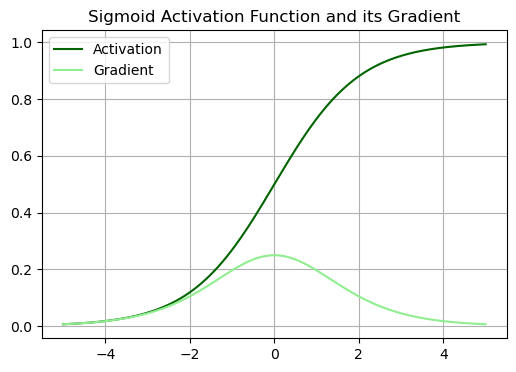

In [18]:
# Plot the sigmoid function and its gradient
plot(sigmoid, sigmoid_grad, "Sigmoid Activation Function and its Gradient")

plt.show()  # Show the plot

In [19]:
from sklearn.model_selection import train_test_split, KFold


def KFoldCrossValidation(
    k, X, y, epochs, draw_curve=True, learning_rate=0.0001, 
    activation=lambda x: x, activation_grad=lambda x: 1,
    verbose=True
):
    """
    K-Fold Validation
    
    Parameters
    ---------
    k: int
        The number of fold in validation
    X: numpy.ndarray
        Input samples, shape (n_samples, input_dim)
    y: numpy.ndarray
        Labels, shape (n_samples, output_dim)
    epochs: int
        Number of training epochs
    draw_curve: bool
        Whether to draw the validation loss against training steps
    learning_rate: float
        Learning rate
    activation: Callable
        Activation function
    activation_grad: Callable
        Gradient of activate function
    verbose: bool
        Whether to print information
    
    Returns
    ------
    model: list
        List of k models
    """
    # Reshape the X,y if they are rank-1
    if len(X.shape) == 1:
        X = X.reshape((-1, 1))
    if len(y.shape) == 1:
        y = y.reshape((-1, 1))
    input_dim = X.shape[1]
    output_dim = y.shape[1]
    
    # do a 5-fold validation
    kf = KFold(n_splits=k, shuffle=True)
    
    if draw_curve:
        n_row, n_col = int(np.ceil(k / 3)), 3
        fig, axes = plt.subplots(n_row, n_col, figsize=(5 * n_col, 5 * n_row), constrained_layout=True)
        axes = axes.flatten()
    
    models = []
    train_err_list, test_err_list = [], []
    for i, (train_selector, val_selector) in enumerate(kf.split(X)):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_selector], X[val_selector]
        y_train, y_test = y[train_selector], y[val_selector]
        
        # define you models here
        model = SimplePerceptron(input_dim=X.shape[1],output_dim=y.shape[1],
                                 learning_rate=learning_rate,
                                 activation=activation,
                                 activation_grad=activation_grad)

        
        # futher split the X_train by 80%/20%
        # use train_test_split function in sklearn
        X_train_in, X_val, y_train_in, y_val = train_test_split(X_train, y_train, test_size=0.2)
        
        lowest_val_err = np.inf
        val_err_list = []
        for _ in range(epochs):
            # Train model on a number of epochs, and test performance in the validation set
            model.train_one_epoch(X_train_in, y_train_in)
            val_err = model.evaluate(X_val, y_val)
            val_err_list.append(val_err)
            
            if val_err < lowest_val_err:
                lowest_val_err = val_err
                weights, biases = model.get_weights()

        # The final number of epochs is when the minimum error in validation set occurs    
        if verbose:
            print("Number of epochs with lowest validation:", np.argmin(val_err_list))
        model.set_weights(weights, biases)
        models.append(model)

        # Report MSE on X_train and X_test
        train_err = model.evaluate(X_train, y_train)
        train_err_list.append(train_err)
        test_err = model.evaluate(X_test, y_test)
        test_err_list.append(test_err)
        
        if draw_curve:
            axes[i].plot(np.arange(epochs), np.log10(val_err_list), label='Validation loss', color='darkgreen')
            axes[i].set_xlabel('Epochs')
            axes[i].set_ylabel('Log Loss')
            axes[i].legend()
            axes[i].set_title(f"Epoch {i}")
    
    if verbose:      
        print("Final results:")
        print(f"Training error: {np.mean(train_err_list)}+/-{np.std(train_err_list)}")
        print(f"Testing error: {np.mean(test_err_list)}+/-{np.std(test_err_list)}")
    
    return models

In [20]:
# combine categorical & continuous features
X_train = np.hstack((X_norm, X_onehot))
y_train = y
# print the dimensions
print(X_train.shape, y_train.shape)

(712, 12) (712, 1)


Number of epochs with lowest validation: 3359
Number of epochs with lowest validation: 3629
Number of epochs with lowest validation: 2488
Number of epochs with lowest validation: 770
Number of epochs with lowest validation: 4416
Final results:
Training error: 0.07080988092662978+/-0.0012806294267697998
Testing error: 0.07302792612949265+/-0.004184158917888665


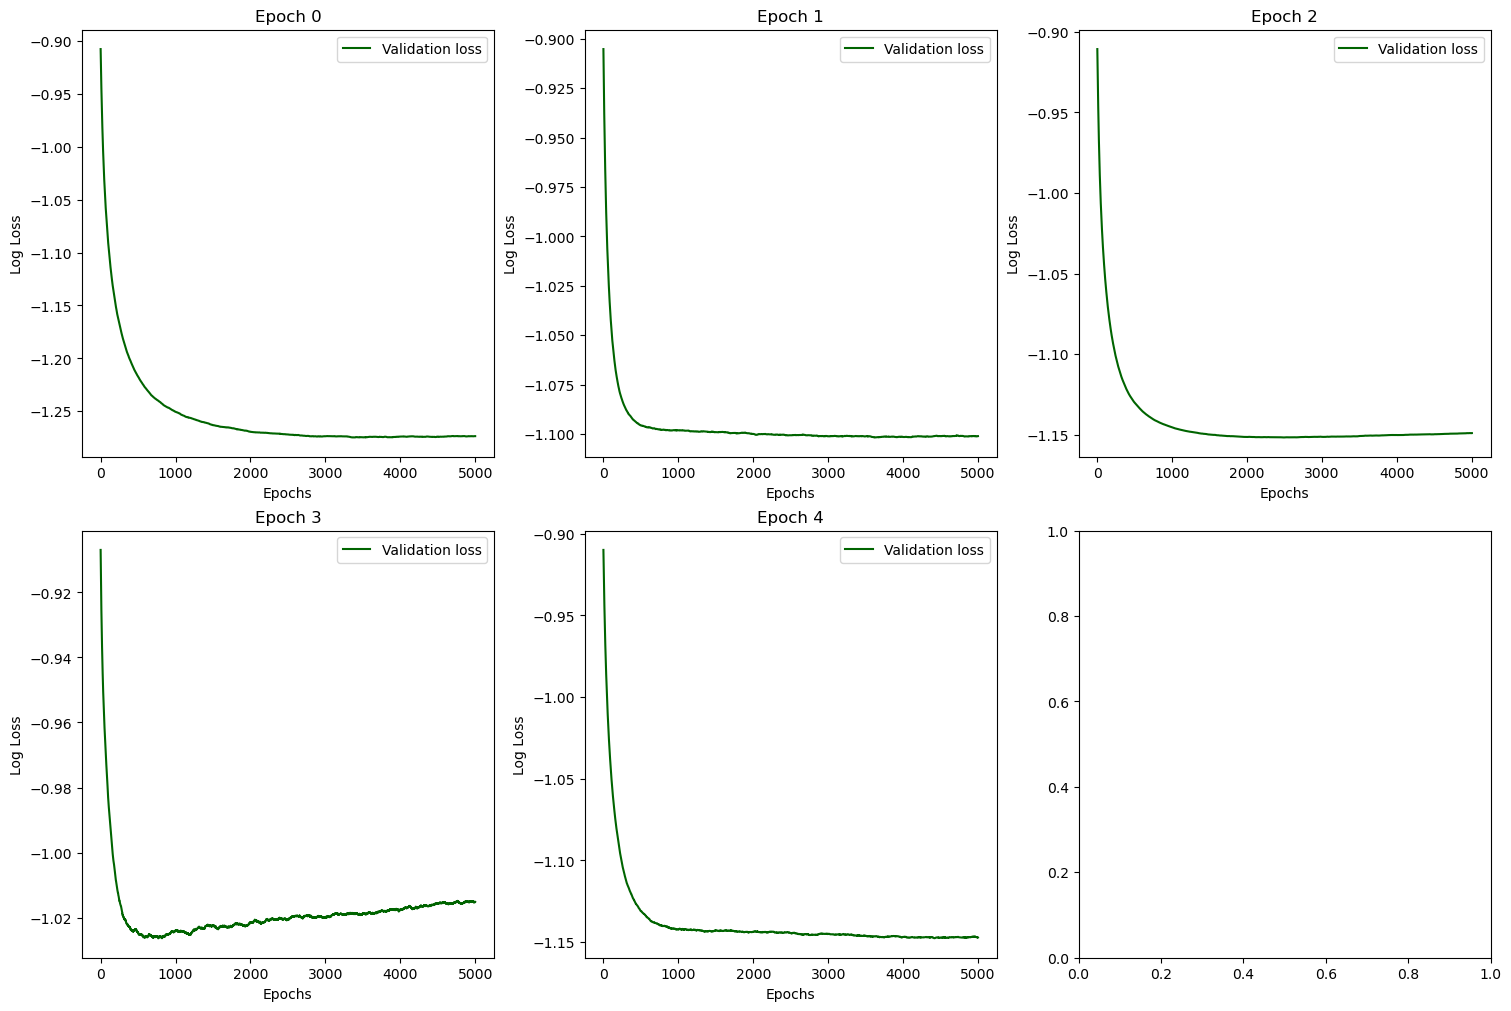

In [21]:
model_2 = KFoldCrossValidation(
    k=5, X=X_train, y=y_train, epochs=5000, draw_curve=True, learning_rate=0.01, 
    activation=sigmoid, activation_grad=sigmoid_grad,
    verbose=True
)

**Conclusion:**
<br>Our model provides a advantage in predictions. We can predict with 93% accuracy. 

# Question 3

## (a)

**Note**: `KFoldCrossValidation` returns a model list, just pick any one of them (for example, the first) for prediction on test dataset.

In [22]:
def generate_X(number, boundary):
    x = (np.random.random(number) * 2 - 1) * boundary
    return x
    
def generate_data(number, stochasticity=0.2):
    x = generate_X(number, 10)
    ratio = generate_X(number, stochasticity) + 1
    y = 3 * np.sin(x) * ratio + 5
    return x, y

In [23]:
def show_correlation(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    r = [
        np.min([np.min(y_pred), np.min(y_true)]), 
        np.max([np.max(y_pred), np.max(y_true)])
    ]
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    plt.scatter(y_pred, y_true, s=5)
    ax.plot(r, r, color='red')
    ax.set_xlabel("Predictions")
    ax.set_ylabel("Ground truth")
    corr = np.corrcoef([y_pred, y_true])[1, 0]
    print("Correlation coefficient:", corr)

def show_plot(x, y_true, y_pred=None):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.scatter(x, y_true, s=0.5, label='Ground Truth')
    if y_pred is not None:
        ax.scatter(x, y_pred, s=0.5, label="Predicted")
    ax.legend()

In [24]:
# Generate 5000 training data points
X_train, y_train = generate_data(5000)
X_train = X_train.reshape(-1, 1) 
y_train = y_train.reshape(-1, 1)

Number of epochs with lowest validation: 34
Number of epochs with lowest validation: 43
Number of epochs with lowest validation: 34
Number of epochs with lowest validation: 42
Number of epochs with lowest validation: 289
Final results:
Training error: 2.0807548733685985+/-0.010743435156802457
Testing error: 2.0873909586484167+/-0.040883393636273094


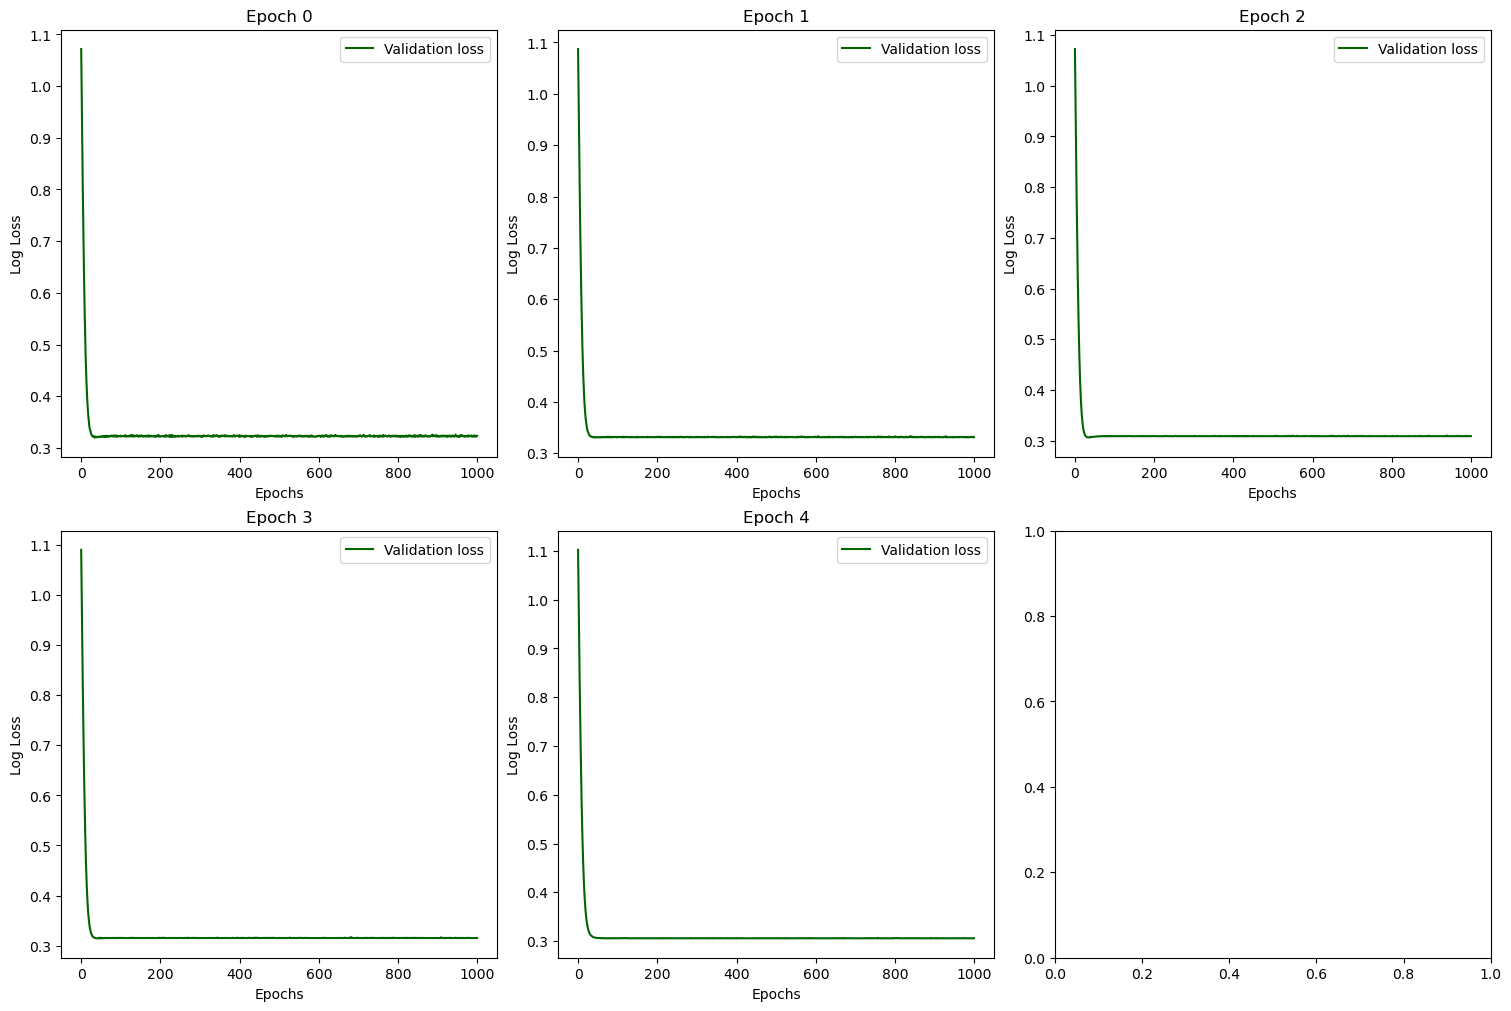

In [25]:
model_a = KFoldCrossValidation(
    k=5, X=X_train, y=y_train, epochs=1000, draw_curve=True, 
    learning_rate=0.001, 
    activation=lambda x: x, activation_grad=lambda x: 1,
    verbose=True
)

In [26]:
# Generate 1000 new test data points
X_test, y_test = generate_data(1000)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Correlation coefficient: 0.16288805141713253


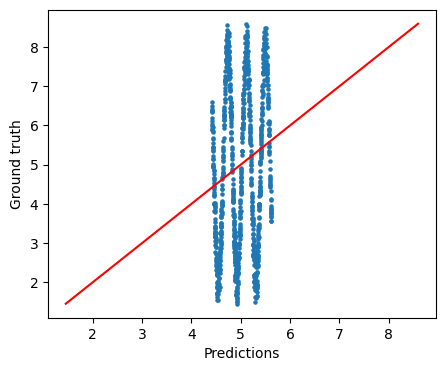

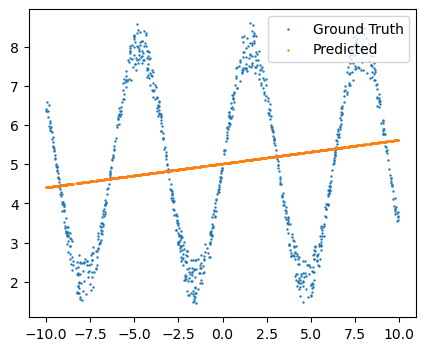

In [27]:
# Use the trained models to predict on the test data and show correlation
new_model = model_a[-1]
predictions = new_model.predict(X_test)

# Show the correlation between the predictions and the actual test data
show_correlation(predictions, y_test)

# Show the scatter plot of the test data and predictions
show_plot(X_test, y_test, predictions)

## (b)

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as mse

def KFoldCrossValidationMLP(
    k, X, y, epochs, 
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True
):
    """
    K-Fold Validation for MLPRegressor
    
    Parameters
    ---------
    k: int
        The number of fold in validation
    X: numpy.ndarray
        Input samples, shape (n_samples, input_dim)
    y: numpy.ndarray
        Labels, shape (n_samples, output_dim)
    epochs: int
        Number of training epochs
    kwargs: keyword arguments
        Arguments to init a SimplePerceptron model. i.e. learning_rate, activation, activation_grad
    
    Returns
    ------
    model: SimplePerceptron
        The best model
    """
    # MLPRegressor takes 2D array for features
    # and 1D array for labels if the dimension of output is 1
    if len(X.shape) == 1:
        X = X.reshape(-1, 1) 
    

    # do a 5-fold validation
    kf = KFold(n_splits=k, shuffle=True)
    
    models = []
    train_err_list, test_err_list = [], []
    for i, (train_selector, val_selector) in enumerate(kf.split(np.arange(X.shape[0]))):
        # Decide training examples and testing examples for this fold
        X_train, X_test = X[train_selector], X[val_selector]
        y_train, y_test = y[train_selector], y[val_selector]
        
        model = MLPRegressor(
            max_iter=epochs,
            activation=activation, 
            learning_rate_init=learning_rate,
            hidden_layer_sizes=hidden_layers,
            early_stopping=True, validation_fraction=0.2, learning_rate='constant', 
        )
        model.fit(X_train, y_train)
        models.append(model)

        # Report MSE on X_train and X_test
        y_train_pred = model.predict(X_train)
        train_err = mse(y_train_pred, y_train)
        train_err_list.append(train_err)
        
        y_test_pred = model.predict(X_test)
        test_err = mse(y_test_pred, y_test)
        test_err_list.append(test_err)
        if verbose:
            print(f"Train error: {train_err}, Test error: {test_err}")
        
    
    if verbose:      
        print("Final results:")
        print(f"Training error: {np.mean(train_err_list)}+/-{np.std(train_err_list)}")
        print(f"Testing error: {np.mean(test_err_list)}+/-{np.std(test_err_list)}")
    
    return models[np.argmin(test_err_list)]

In [29]:
model_b = KFoldCrossValidationMLP(
    k=5, X=X_train, y=y_train, epochs=1000, 
    learning_rate=0.001, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True
)

/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.56517398570978, Test error: 0.5763920871418582


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.44465583131129427, Test error: 0.4693876349746409


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.979050414763873, Test error: 1.0837759004350151


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.46547404635040457, Test error: 0.4659542053138012
Train error: 2.340685658064563, Test error: 2.344200768102295
Final results:
Training error: 0.959007987239983+/-0.7173108108534356
Testing error: 0.987942119193522+/-0.7154530313848185


Correlation coefficient: 0.9473312378341712


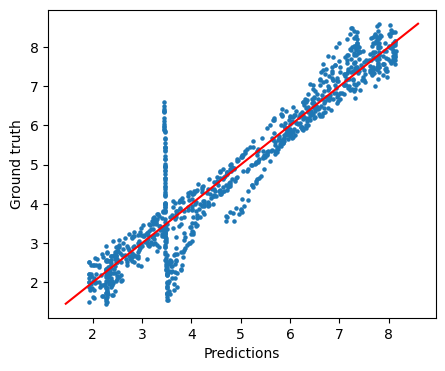

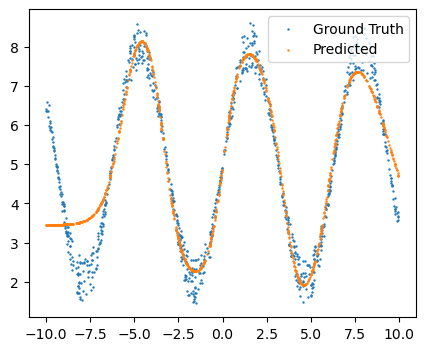

In [30]:
# Use the trained models to predict on the test data and show correlation
predictions = model_b.predict(X_test)

# Show the correlation between the predictions and the actual test data
show_correlation(predictions, y_test)

# Show the scatter plot of the test data and predictions
show_plot(X_test, y_test, predictions)

## (c)

**1. Number of Neurons in Hidden Layers:** 
Increase or decrease the number of neurons in the hidden layer(s). Adding more neurons can help the model capture more complex patterns, but too many can lead to overfitting.

In [31]:
model_c1 = KFoldCrossValidationMLP(
    k=5, X=X_train, y=y_train, epochs=1000, 
    learning_rate=0.001, 
    activation='tanh',
    hidden_layers=(8,8),
    verbose=True
)

/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.06254985008294121, Test error: 0.06315829883078311


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.06378247657899844, Test error: 0.06324485622213688


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.06045439542195596, Test error: 0.06210879546828731


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.06351898700307285, Test error: 0.061739352142598


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.6049112623460221, Test error: 0.5759805069140284
Final results:
Training error: 0.17104339428659812+/-0.21693709012860588
Testing error: 0.16524636191556671+/-0.2053679022342855


Correlation coefficient: 0.9925290461996046


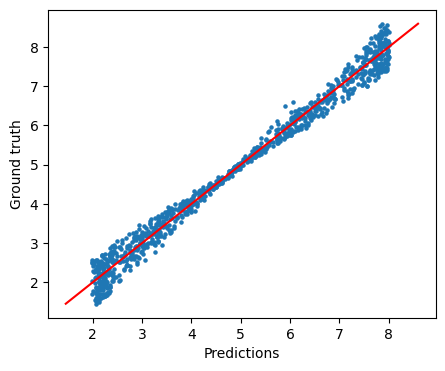

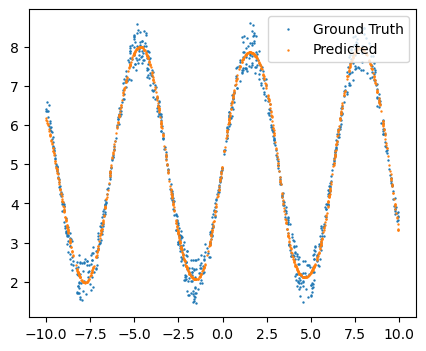

In [32]:
# Use the trained models to predict on the test data and show correlation
predictions = model_c1.predict(X_test)

# Show the correlation between the predictions and the actual test data
show_correlation(predictions, y_test)

# Show the scatter plot of the test data and predictions
show_plot(X_test, y_test, predictions)

**Conclusion:**
<br>Adding more layers improves performance

In [33]:
model_c1_2 = KFoldCrossValidationMLP(
    k=5, X=X_train, y=y_train, epochs=1000, 
    learning_rate=0.001, 
    activation='tanh',
    hidden_layers=(16,),
    verbose=True
)

/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.5366643879436935, Test error: 0.5148596160041594


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.4114144000951622, Test error: 0.3418629545398302


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.4878418428248361, Test error: 0.5799859891872402


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.4459162768607384, Test error: 0.4291178787999605
Train error: 0.5566937359300318, Test error: 0.5727597623484816
Final results:
Training error: 0.48770612873089236+/-0.05426424068957968
Testing error: 0.4877172401759344+/-0.0907632293159189


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Correlation coefficient: 0.9550162737026326


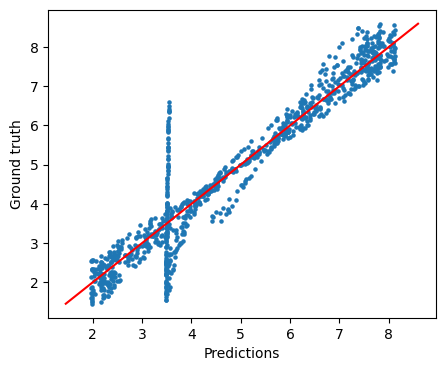

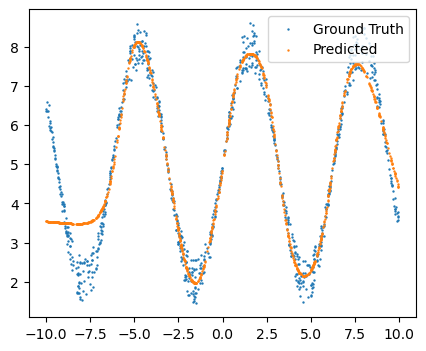

In [34]:
# Use the trained models to predict on the test data and show correlation
predictions = model_c1_2.predict(X_test)

# Show the correlation between the predictions and the actual test data
show_correlation(predictions, y_test)

# Show the scatter plot of the test data and predictions
show_plot(X_test, y_test, predictions)

**Conclusion:**
<br>Adding more neruons improves performance

**2. Learning Rate:** 
Adjust the learning rate. A smaller learning rate can lead to better convergence, but if it's too low, training can be slow, and the network may get stuck in local minima. While a larger rate can speed up training but might overshoot the minimum.

In [35]:
model_c2 = KFoldCrossValidationMLP(
    k=5, X=X_train, y=y_train, epochs=1000, 
    learning_rate=0.01, 
    activation='tanh',
    hidden_layers=(8,),
    verbose=True
)

/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.36925016204856487, Test error: 0.35140556693307134


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.35295247354123876, Test error: 0.4216776239721017


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.3544303317949085, Test error: 0.38539590342499797


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.07034500069742108, Test error: 0.06779418298891386


/Users/jesslin/anaconda3/envs/c142/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error: 0.3805315969667, Test error: 0.30654179597217057
Final results:
Training error: 0.30550191300976665+/-0.1180149244782466
Testing error: 0.3065630146582511+/-0.12528959058938907


Correlation coefficient: 0.9916448360658237


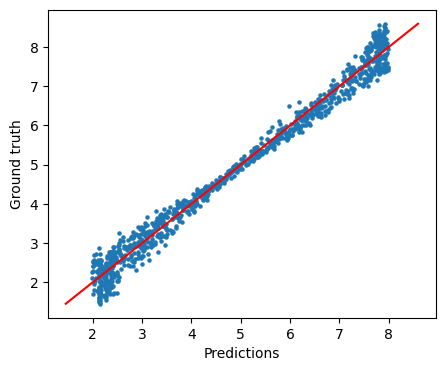

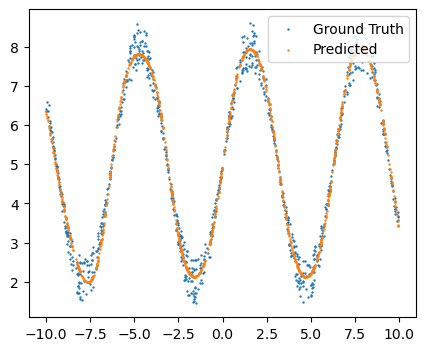

In [36]:
# Use the trained models to predict on the test data and show correlation
predictions = model_c2.predict(X_test)

# Show the correlation between the predictions and the actual test data
show_correlation(predictions, y_test)

# Show the scatter plot of the test data and predictions
show_plot(X_test, y_test, predictions)

**Conclusion:**
<br>Larger rate improves performance